In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import train_test_split

pd.set_option('display.max_colwidth', None)

In [2]:
inspections = pd.read_csv("prohlidky.csv")
inspections = inspections.drop(['Unnamed: 0'], axis=1)
inspections.DatKont = pd.to_datetime(inspections.DatKont)
inspections.DatPrvReg = pd.to_datetime(inspections.DatPrvReg)

In [3]:
#deal with invalid dates
inspections['DatPrvReg'] = inspections['DatPrvReg'].apply(lambda x: pd.to_datetime('1910-01-01') if x.year < 1910 else x)

#calculate vehicle's age
inspections['age'] = 2018 - inspections.DatPrvReg.dt.year

#convert category columns to codes 
string_cols = inspections.select_dtypes(['object']).columns
string_cols = string_cols.drop('VIN')
inspections[string_cols] = inspections[string_cols].astype('category').apply(lambda x: x.cat.codes)

#create dataframe to store outliers
outliers = pd.DataFrame(data=None, columns=inspections.drop(['STK', 'VIN', 'DatPrvReg', 'DatKont'], axis=1).columns)

In [4]:
#find suitable input parametres for DBSCAN
param_grid = {
    'min_samples': range(5,20),
    'eps': [0.1,0.2,0.5,1]
}
param_comb = ParameterGrid(param_grid)

sample = inspections.drop(['STK', 'VIN', 'DatPrvReg', 'DatKont'], axis=1).sample(10000)
data = sample

#scaling
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

#calculate principal components
data = PCA(n_components=3).fit_transform(data)

out = []
for params in param_comb:    
    outlier_detection = DBSCAN(eps = params['eps'], metric='euclidean', min_samples = params['min_samples'], n_jobs = -1)
    clusters = outlier_detection.fit_predict(data)
    sample['cluster'] = clusters
    
    display(params, len(sample[sample.cluster == -1].index))
    
    out.append(len(sample[sample.cluster == -1].index))

{'eps': 0.1, 'min_samples': 5}

67

{'eps': 0.1, 'min_samples': 6}

69

{'eps': 0.1, 'min_samples': 7}

86

{'eps': 0.1, 'min_samples': 8}

102

{'eps': 0.1, 'min_samples': 9}

113

{'eps': 0.1, 'min_samples': 10}

132

{'eps': 0.1, 'min_samples': 11}

132

{'eps': 0.1, 'min_samples': 12}

139

{'eps': 0.1, 'min_samples': 13}

157

{'eps': 0.1, 'min_samples': 14}

182

{'eps': 0.1, 'min_samples': 15}

202

{'eps': 0.1, 'min_samples': 16}

210

{'eps': 0.1, 'min_samples': 17}

224

{'eps': 0.1, 'min_samples': 18}

263

{'eps': 0.1, 'min_samples': 19}

284

{'eps': 0.2, 'min_samples': 5}

2

{'eps': 0.2, 'min_samples': 6}

2

{'eps': 0.2, 'min_samples': 7}

2

{'eps': 0.2, 'min_samples': 8}

2

{'eps': 0.2, 'min_samples': 9}

2

{'eps': 0.2, 'min_samples': 10}

2

{'eps': 0.2, 'min_samples': 11}

2

{'eps': 0.2, 'min_samples': 12}

2

{'eps': 0.2, 'min_samples': 13}

3

{'eps': 0.2, 'min_samples': 14}

3

{'eps': 0.2, 'min_samples': 15}

3

{'eps': 0.2, 'min_samples': 16}

3

{'eps': 0.2, 'min_samples': 17}

3

{'eps': 0.2, 'min_samples': 18}

5

{'eps': 0.2, 'min_samples': 19}

5

{'eps': 0.5, 'min_samples': 5}

0

{'eps': 0.5, 'min_samples': 6}

0

{'eps': 0.5, 'min_samples': 7}

0

{'eps': 0.5, 'min_samples': 8}

0

{'eps': 0.5, 'min_samples': 9}

0

{'eps': 0.5, 'min_samples': 10}

0

{'eps': 0.5, 'min_samples': 11}

0

{'eps': 0.5, 'min_samples': 12}

0

{'eps': 0.5, 'min_samples': 13}

0

{'eps': 0.5, 'min_samples': 14}

0

{'eps': 0.5, 'min_samples': 15}

0

{'eps': 0.5, 'min_samples': 16}

0

{'eps': 0.5, 'min_samples': 17}

0

{'eps': 0.5, 'min_samples': 18}

0

{'eps': 0.5, 'min_samples': 19}

0

{'eps': 1, 'min_samples': 5}

0

{'eps': 1, 'min_samples': 6}

0

{'eps': 1, 'min_samples': 7}

0

{'eps': 1, 'min_samples': 8}

0

{'eps': 1, 'min_samples': 9}

0

{'eps': 1, 'min_samples': 10}

0

{'eps': 1, 'min_samples': 11}

0

{'eps': 1, 'min_samples': 12}

0

{'eps': 1, 'min_samples': 13}

0

{'eps': 1, 'min_samples': 14}

0

{'eps': 1, 'min_samples': 15}

0

{'eps': 1, 'min_samples': 16}

0

{'eps': 1, 'min_samples': 17}

0

{'eps': 1, 'min_samples': 18}

0

{'eps': 1, 'min_samples': 19}

0

In [ ]:
%matplotlib notebook

fig = plt.figure()
ax = Axes3D(fig)
ax.plot(out, min_samples, eps)

ax.set_xlabel('#outliers')
ax.set_ylabel('min_samples')
ax.set_zlabel('eps')
plt.title('Počet anomálií podle parametrů modelu')
plt.gca().patch.set_facecolor('white')
ax.view_init(20, 100)

In [6]:
#find suitable min_samples for DBSCAN
out = []

sample = inspections.drop(['STK', 'VIN', 'DatPrvReg', 'DatKont'], axis=1).sample(10000)

data = sample
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

data = PCA(n_components=3).fit_transform(data)

for min_samples in range(5,50):    
    outlier_detection = DBSCAN(eps = 0.2, metric='euclidean', min_samples = min_samples, n_jobs = -1)
    clusters = outlier_detection.fit_predict(data)
    sample['cluster'] = clusters
    out.append(len(sample[sample.cluster == -1].index))

<IPython.core.display.Javascript object>


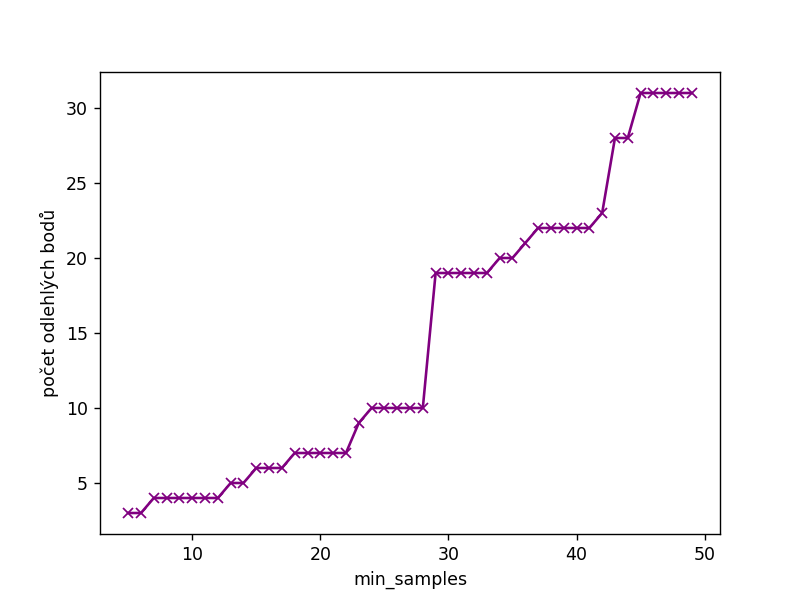

In [14]:
#number of outliers depending on min_samples 

plt.plot(range(5,50), out, 'bx-', color="purple")
plt.xlabel('min_samples')
plt.ylabel('počet odlehlých bodů')
plt.show()

In [132]:
#find outliers
#repeat ~10 times
sample = inspections.drop(['STK', 'VIN', 'DatPrvReg', 'DatKont'], axis=1).sample(100000)

data = sample
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

data = PCA(n_components=3).fit_transform(data)

outlier_detection = DBSCAN(eps = 0.2, metric='euclidean', min_samples = 38, n_jobs = -1)
clusters = outlier_detection.fit_predict(data)

<IPython.core.display.Javascript object>


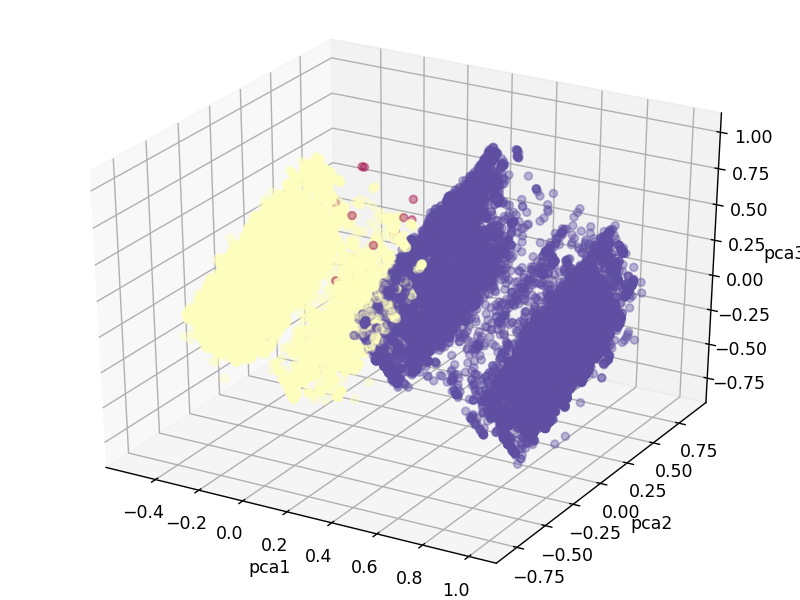

Text(0.5, 0, 'pca3')

In [10]:
%matplotlib notebook

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data[:,0], data[:,1], data[:,2], c=clusters, alpha=0.4, cmap="Spectral")
ax.set_xlabel('pca1')
ax.set_ylabel('pca2')
ax.set_zlabel('pca3')

In [135]:
#store outliers after each iteration
sample['cluster'] = clusters
outliers = outliers.append(sample[sample.cluster == -1])
outliers = outliers.drop_duplicates()
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485 entries, 3522303 to 2000453
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DrTP        485 non-null    object 
 1   TypMot      485 non-null    object 
 2   TZn         485 non-null    object 
 3   DrVoz       485 non-null    object 
 4   ObchOznTyp  485 non-null    object 
 5   Ct          485 non-null    object 
 6   Km          485 non-null    object 
 7   ZavA        485 non-null    object 
 8   ZavB        485 non-null    object 
 9   ZavC        485 non-null    object 
 10  VyslSTK     485 non-null    object 
 11  VyslEmise   485 non-null    object 
 12  age         485 non-null    object 
 13  cluster     485 non-null    float64
dtypes: float64(1), object(13)
memory usage: 56.8+ KB


In [136]:
#store outliers to csv
outliers.to_csv('outliers.csv')

In [137]:
inspections2 = pd.read_csv("prohlidky.csv")
inspections2 = inspections2.drop(['Unnamed: 0'], axis=1)
inspections2.DatKont = pd.to_datetime(inspections2.DatKont)
inspections2.DatPrvReg = pd.to_datetime(inspections2.DatPrvReg)

In [141]:
#resolve outliers' numerical columns
outliers = inspections2.loc[outliers.index]
outliers.fillna(value=np.nan, inplace=True)

In [142]:
outliers

,STK,DrTP,VIN,DatKont,TypMot,TZn,DrVoz,ObchOznTyp,Ct,DatPrvReg,Km,ZavA,ZavB,ZavC,VyslSTK,VyslEmise
3522303,3417,pravidelna,ZFA19200000329182,2018-12-07 13:30:28.810,192A1.000,FIAT,OSOBNI AUTOMOBIL,STILO (192),M1,2003-06-23,229122,4,1,0,castecne zpusobile,nevyhovuje
1626407,3322,pravidelna,VNKJV18330A104493,2018-10-26 07:26:41.047,1SZ,TOYOTA,OSOBNI AUTOMOBIL,YARIS,M1,2002-06-28,224382,2,2,0,castecne zpusobile,nevyhovuje
3617276,3530,pravidelna,SALLTGM884A862542,2018-12-14 12:33:51.573,15P,LAND ROVER,OSOBNI AUTOMOBIL,DISCOVERY (LT),M1G,2004-08-11,228192,6,5,0,castecne zpusobile,nevyhovuje
2942519,3208,pravidelna,VF7EB4HWG13145951,2018-10-15 11:39:35.777,4HW,CITROEN,OSOBNI AUTOMOBIL,C8,M1,2004-07-15,231666,4,4,0,castecne zpusobile,castecne vyhovuje
2683940,3740,pravidelna,VF7DC4HXB76355484,2018-11-08 09:45:56.880,4HX,CITROEN,OSOBNI AUTOMOBIL,C5 (D),M1,2005-03-16,159994,0,1,0,castecne zpusobile,nevyhovuje
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382967,3814,pravidelna,VF7GJ9HXC93427075,2018-12-19 07:54:42.313,9HX,CITROEN,NAKLADNI AUTOMOBIL,BERLINGO,N1,2007-02-22,420588,5,4,0,castecne zpusobile,nevyhovuje
2815339,3766,pravidelna,ZAR93900005011091,2018-11-27 17:03:35.817,939A3000,ALFA ROMEO,OSOBNI AUTOMOBIL,BRERA (939),M1,2006-09-13,207210,1,1,0,castecne zpusobile,nevyhovuje
1374098,3648,pravidelna,WV1ZZZ2KZ5X043945,2018-11-07 16:20:43.687,BDJ,VOLKSWAGEN,NAKLADNI AUTOMOBIL,CADDY,N1,2004-12-01,287183,7,1,0,castecne zpusobile,castecne vyhovuje
3622815,3516,pravidelna,ZCFA1EG0302540393,2018-11-20 10:49:55.330,F4AE3681D,IVECO,NAKLADNI AUTOMOBIL,EUROCARGO,N2,2009-09-30,452418,3,2,0,castecne zpusobile,castecne vyhovuje


In [ ]:
#generate ProfileReport for outliers
from pandas_profiling import ProfileReport
profile = ProfileReport(outliers, title='Outliers Profiling Report', html={'style':{'full_width':True}})
profile.to_file(output_file="outliers_report.html")

In [143]:
#outliers with inspection result castecne zpusobile
outliers[outliers.VyslSTK == 'castecne zpusobile']

,STK,DrTP,VIN,DatKont,TypMot,TZn,DrVoz,ObchOznTyp,Ct,DatPrvReg,Km,ZavA,ZavB,ZavC,VyslSTK,VyslEmise
3522303,3417,pravidelna,ZFA19200000329182,2018-12-07 13:30:28.810,192A1.000,FIAT,OSOBNI AUTOMOBIL,STILO (192),M1,2003-06-23,229122,4,1,0,castecne zpusobile,nevyhovuje
1626407,3322,pravidelna,VNKJV18330A104493,2018-10-26 07:26:41.047,1SZ,TOYOTA,OSOBNI AUTOMOBIL,YARIS,M1,2002-06-28,224382,2,2,0,castecne zpusobile,nevyhovuje
3617276,3530,pravidelna,SALLTGM884A862542,2018-12-14 12:33:51.573,15P,LAND ROVER,OSOBNI AUTOMOBIL,DISCOVERY (LT),M1G,2004-08-11,228192,6,5,0,castecne zpusobile,nevyhovuje
2942519,3208,pravidelna,VF7EB4HWG13145951,2018-10-15 11:39:35.777,4HW,CITROEN,OSOBNI AUTOMOBIL,C8,M1,2004-07-15,231666,4,4,0,castecne zpusobile,castecne vyhovuje
2683940,3740,pravidelna,VF7DC4HXB76355484,2018-11-08 09:45:56.880,4HX,CITROEN,OSOBNI AUTOMOBIL,C5 (D),M1,2005-03-16,159994,0,1,0,castecne zpusobile,nevyhovuje
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382967,3814,pravidelna,VF7GJ9HXC93427075,2018-12-19 07:54:42.313,9HX,CITROEN,NAKLADNI AUTOMOBIL,BERLINGO,N1,2007-02-22,420588,5,4,0,castecne zpusobile,nevyhovuje
2815339,3766,pravidelna,ZAR93900005011091,2018-11-27 17:03:35.817,939A3000,ALFA ROMEO,OSOBNI AUTOMOBIL,BRERA (939),M1,2006-09-13,207210,1,1,0,castecne zpusobile,nevyhovuje
1374098,3648,pravidelna,WV1ZZZ2KZ5X043945,2018-11-07 16:20:43.687,BDJ,VOLKSWAGEN,NAKLADNI AUTOMOBIL,CADDY,N1,2004-12-01,287183,7,1,0,castecne zpusobile,castecne vyhovuje
3622815,3516,pravidelna,ZCFA1EG0302540393,2018-11-20 10:49:55.330,F4AE3681D,IVECO,NAKLADNI AUTOMOBIL,EUROCARGO,N2,2009-09-30,452418,3,2,0,castecne zpusobile,castecne vyhovuje


In [144]:
#outliers with vehicle brand FIAT 
outliers[outliers.TZn == 'FIAT']

,STK,DrTP,VIN,DatKont,TypMot,TZn,DrVoz,ObchOznTyp,Ct,DatPrvReg,Km,ZavA,ZavB,ZavC,VyslSTK,VyslEmise
3522303,3417,pravidelna,ZFA19200000329182,2018-12-07 13:30:28.810,192A1.000,FIAT,OSOBNI AUTOMOBIL,STILO (192),M1,2003-06-23,229122,4,1,0,castecne zpusobile,nevyhovuje
2873488,3701,pravidelna,ZFA18200005046557,2018-10-12 07:27:02.793,182A2000,FIAT,OSOBNI AUTOMOBIL,BRAVO,M1,2000-06-07,154640,3,3,0,castecne zpusobile,nevyhovuje
2376859,3243,pravidelna,ZFA31200000073762,2018-11-29 09:45:58.427,169A1000,FIAT,OSOBNI AUTOMOBIL,500,M1,2008-01-31,155862,1,1,0,castecne zpusobile,nevyhovuje
3659914,3216,pravidelna,ZFA25000001683179,2018-10-30 08:47:20.853,4HV,FIAT,NAKLADNI AUTOMOBIL,DUCATO,N1,2009-10-02,136692,2,1,0,castecne zpusobile,nevyhovuje
2236387,3633,pravidelna,ZFA35000000010070,2018-10-25 15:05:36.337,843A1000,FIAT,OSOBNI AUTOMOBIL,IDEA,M1,2004-05-27,165055,5,3,0,castecne zpusobile,castecne vyhovuje
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3683374,3649,pravidelna,ZFA17600002366761,2018-11-09 09:54:12.620,176B 4.000,FIAT,OSOBNI AUTOMOBIL,PUNTO,M1,1996-07-03,229581,11,2,0,castecne zpusobile,nevyhovuje
1428487,3321,pravidelna,ZFA22500006879294,2018-12-14 10:44:56.987,350A1000,FIAT,NAKLADNI AUTOMOBIL,FIORINO,N1,2014-12-31,26500,0,1,0,castecne zpusobile,nevyhovuje
1720542,3773,pravidelna,ZFA18800005101164,2018-10-26 17:38:59.740,188A4000,FIAT,OSOBNI AUTOMOBIL,PUNTO (188),M1,2001-05-31,109072,2,2,0,castecne zpusobile,nevyhovuje
2534490,3430,pravidelna,ZFA18700001191139,2018-11-19 10:53:23.187,187A1000,FIAT,OSOBNI AUTOMOBIL,SEICENTO,M1,2005-12-29,53941,2,2,0,castecne zpusobile,castecne vyhovuje


In [155]:
outliers['DatPrvReg'] = outliers['DatPrvReg'].apply(lambda x: pd.to_datetime('1910-01-01') if x.year < 1910 else x)
outliers['age'] = 2018 - outliers.DatPrvReg.dt.year

inspections2['DatPrvReg'] = inspections2['DatPrvReg'].apply(lambda x: pd.to_datetime('1910-01-01') if x.year < 1910 else x)
inspections2['age'] = 2018 - inspections2.DatPrvReg.dt.year

14.0

15.202061855670102

<IPython.core.display.Javascript object>


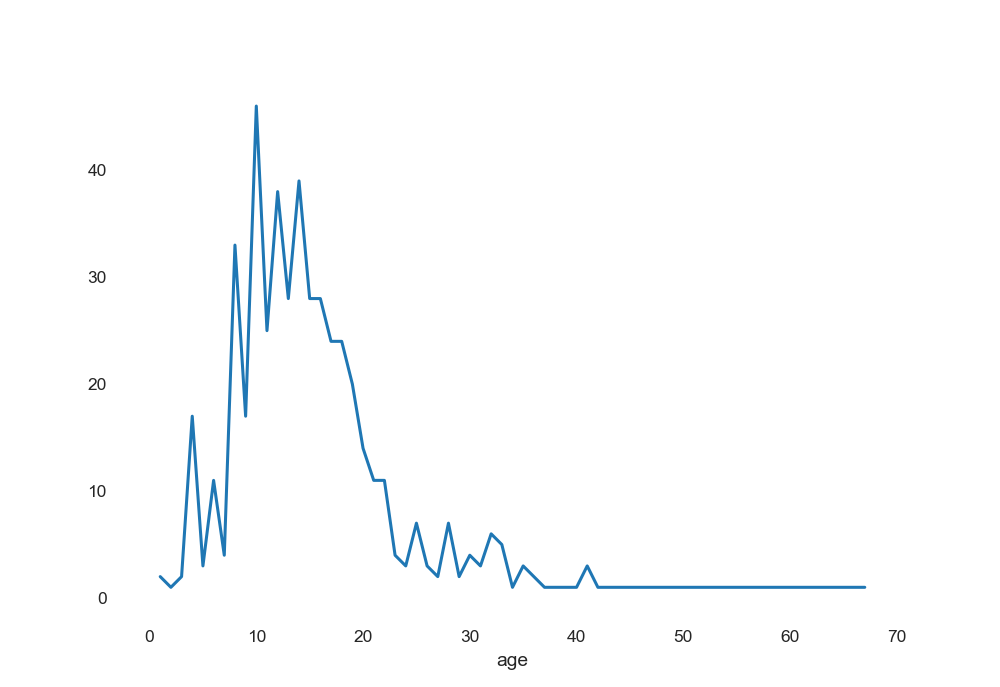

In [173]:
#outliers' median a mean age
display(outliers.age.median())
display(outliers.age.mean())
outliers.groupby('age').count().STK.plot()

12.0

13.41322787524518

<IPython.core.display.Javascript object>


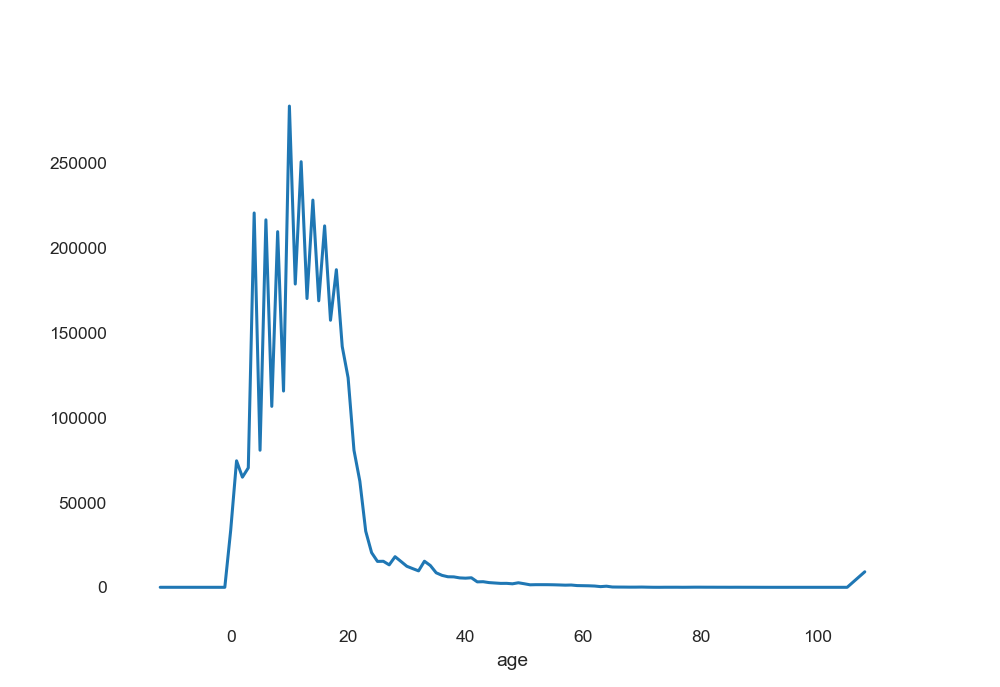

In [160]:
#total median a mean age
display(inspections2.age.median())
display(inspections2.age.mean())
inspections2.groupby('age').count().STK.plot()

In [182]:
#outliers' ZavA, ZavB, ZavC counts
outliers.groupby('ZavA').count().STK.plot()
outliers.groupby('ZavB').count().STK.plot()
outliers.groupby('ZavC').count().STK.plot()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


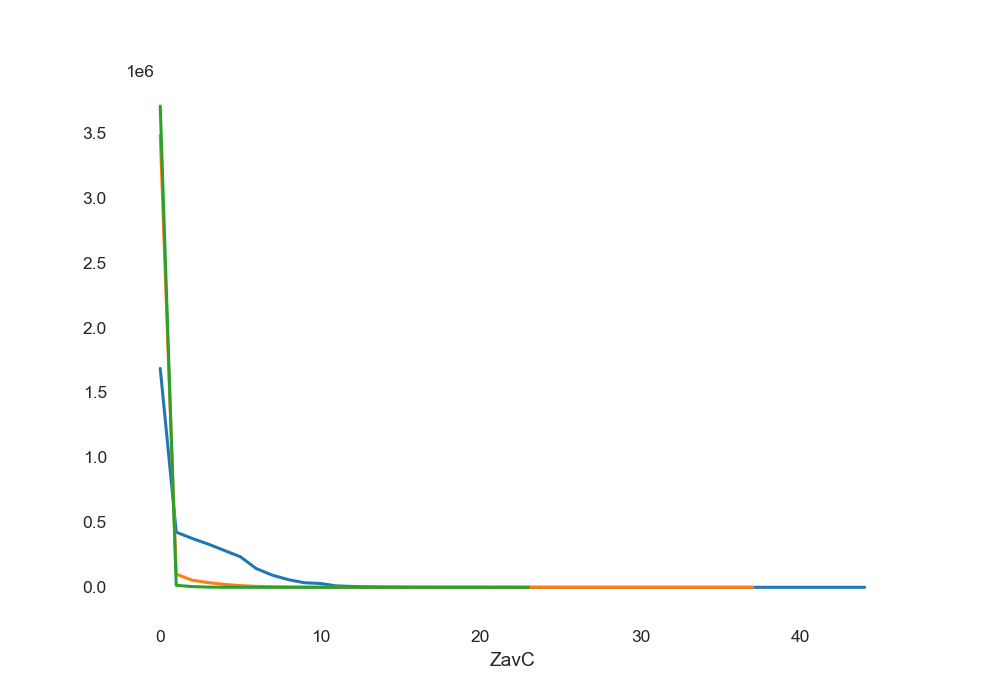

In [162]:
#total ZavA, ZavB, ZavC counts
inspections2.groupby('ZavA').count().STK.plot()
inspections2.groupby('ZavB').count().STK.plot()
inspections2.groupby('ZavC').count().STK.plot()

In [171]:
print('Outliers avg Km:')
display(outliers.Km.mean())
print('Total avg Km:')
display(inspections2.Km.mean())

print('Outliers avg ZavA count:')
display(outliers.ZavA.mean())
print('Total avg ZavA count:')
display(inspections2.ZavA.mean())

print('Outliers avg ZavB count:')
display(outliers.ZavB.mean())
print('Total avg ZavB count:')
display(inspections2.ZavB.mean())

print('Outliers avg ZavC count:')
display(outliers.ZavC.mean())
print('Total avg ZavC count:')
display(inspections2.ZavC.mean())

Outliers avg Km:


229060.38144329897

Total avg Km:


158319.9790626947

Outliers avg ZavA count:


3.288659793814433

Total avg ZavA count:


2.0010508616502283

Outliers avg ZavB count:


2.6350515463917525

Total avg ZavB count:


0.1660004683012867

Outliers avg ZavC count:


0.030927835051546393

Total avg ZavC count:


0.009282074816092506

In [190]:
display(inspections2[inspections2.VyslEmise == 'nevyhovuje'].age.mean())
display(inspections2[inspections2.VyslEmise == 'nevyhovuje'].Km.mean())
display(inspections2[inspections2.VyslEmise == 'nevyhovuje'].ZavA.mean())
display(inspections2[inspections2.VyslEmise == 'nevyhovuje'].ZavB.mean())
display(inspections2[inspections2.VyslEmise == 'nevyhovuje'].ZavC.mean())

14.392504626773597

210807.0825107958

3.3804750154225784

2.894663787785318

0.03639728562615669

In [227]:
#dropping columns which cause skewness
sample = inspections.drop(['STK', 'VIN', 'DatPrvReg', 'DatKont', 'VyslSTK', 'VyslEmise', 'DrTP'], axis=1).sample(100000)

data = sample
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

data = PCA(n_components=3).fit_transform(data)

outlier_detection = DBSCAN(eps = 0.15, metric='euclidean', min_samples = 38, n_jobs = -1)
clusters = outlier_detection.fit_predict(data)

<IPython.core.display.Javascript object>


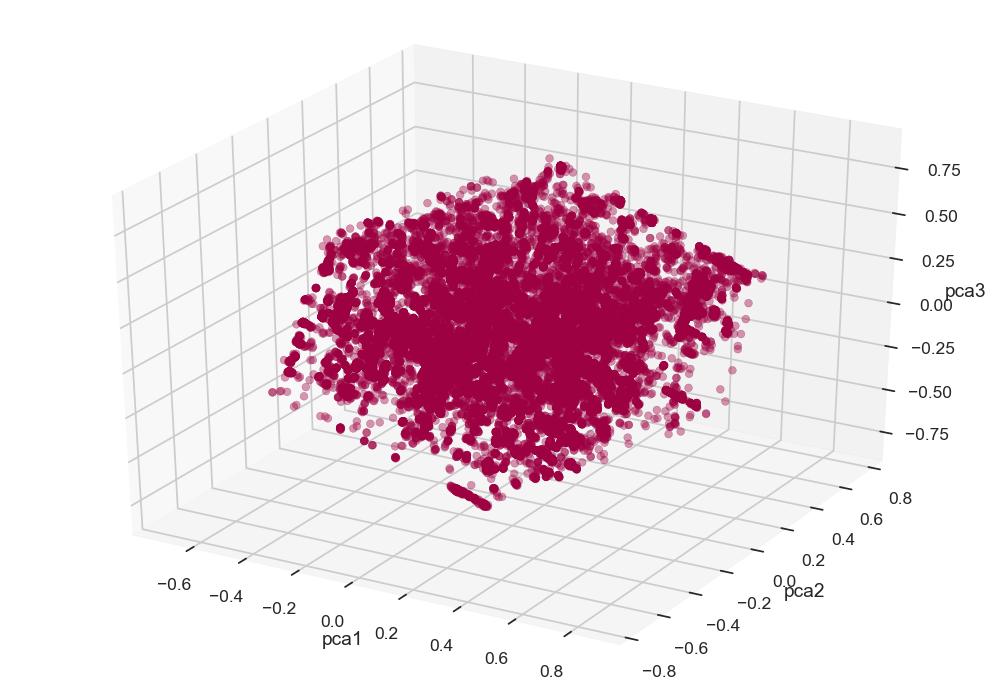

In [228]:
%matplotlib notebook

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data[:,0], data[:,1], data[:,2], c=clusters, alpha=0.4, cmap="Spectral")
ax.set_xlabel('pca1')
ax.set_ylabel('pca2')
ax.set_zlabel('pca3')

sample['cluster'] = clusters

In [229]:
outliers = sample[sample.cluster == -1]

outliers = outliers.drop_duplicates()
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   TypMot      0 non-null      int32
 1   TZn         0 non-null      int16
 2   DrVoz       0 non-null      int8 
 3   ObchOznTyp  0 non-null      int32
 4   Ct          0 non-null      int16
 5   Km          0 non-null      int64
 6   ZavA        0 non-null      int64
 7   ZavB        0 non-null      int64
 8   ZavC        0 non-null      int64
 9   age         0 non-null      int64
 10  cluster     0 non-null      int64
dtypes: int16(2), int32(2), int64(6), int8(1)
memory usage: 0.0 bytes


In [230]:
outliers = inspections2.loc[outliers.index]
outliers.fillna(value=np.nan, inplace=True)

,STK,DrTP,VIN,DatKont,TypMot,TZn,DrVoz,ObchOznTyp,Ct,DatPrvReg,Km,ZavA,ZavB,ZavC,VyslSTK,VyslEmise,age


In [231]:
outliers #empty !

,STK,DrTP,VIN,DatKont,TypMot,TZn,DrVoz,ObchOznTyp,Ct,DatPrvReg,Km,ZavA,ZavB,ZavC,VyslSTK,VyslEmise,age


In [17]:
#dropping columns which cause skewness and changing input parametres 
sample = inspections.drop(['STK', 'VIN', 'DatPrvReg', 'DatKont', 'VyslEmise', 'VyslSTK', 'DrTP'], axis=1).sample(100000)

data = sample
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

data = PCA(n_components=3).fit_transform(data)

outlier_detection = DBSCAN(eps = 0.15, metric='euclidean', min_samples = 20, n_jobs = -1)
clusters = outlier_detection.fit_predict(data)

In [18]:
inspections2 = pd.read_csv("prohlidky.csv")
inspections2 = inspections2.drop(['Unnamed: 0'], axis=1)
inspections2.DatKont = pd.to_datetime(inspections2.DatKont)
inspections2.DatPrvReg = pd.to_datetime(inspections2.DatPrvReg)
sample['cluster'] = clusters
outliers = sample[sample.cluster == -1]
outliers = outliers.drop_duplicates()
outliers = inspections2.loc[outliers.index]
outliers.fillna(value=np.nan, inplace=True)

,STK,DrTP,VIN,DatKont,TypMot,TZn,DrVoz,ObchOznTyp,Ct,DatPrvReg,Km,ZavA,ZavB,ZavC,VyslSTK,VyslEmise


In [19]:
outliers #empty !

,STK,DrTP,VIN,DatKont,TypMot,TZn,DrVoz,ObchOznTyp,Ct,DatPrvReg,Km,ZavA,ZavB,ZavC,VyslSTK,VyslEmise
